              Dengue Fever Analysis and Mapping in Dhaka, Bangladesh

                            Date: 28th March, 2025

This study analyzes dengue fever cases in Dhaka, Bangladesh, using machine learning and geospatial mapping to identify high-risk areas and predict infection patterns.

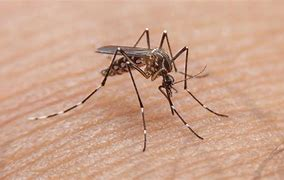

Data Source:The dataset was gotten from kaggle and was collected through surveys in Dhaka, Bangladesh.

Key Findings:
1. Undeveloped areas and developed areas had no much difference in dengue cases.

2. Females had higher dengue cases.

3. Building and tin-shed houses had higher dengue cases.

4. IgG test positivity was the strongest predictor of dengue.

5. Random Forest, Logistic Regression and Decision Tree all had Sam in prediction.

4. Heatmaps revealed dengue hotspots, guiding targeted interventions.

Methodology:

Data Preprocessing: Cleaned and prepared data for analysis.

EDA & Visualization: Explored relationships between features and dengue cases.

Clustering: Identified high-risk areas using K-Means.

Machine Learning: Built Logistic Regression, Decision Tree, and Random Forest models for prediction.

Geospatial Mapping: Used Folium HeatMaps to visualize affected areas.

Recommendations:

1. Targeted mosquito control efforts in high-risk zones.

2. Public health campaigns to raise awareness.

3. Early IgG testing to prevent outbreaks.

4. Integration of climate factors for improved prediction models.


Conclusion:

Dengue risk mapping in Dhaka, Bangladesh provided valuable insights for public health planning and disease prevention in dengue-prone areas.

In [ ]:
!pip install folium branca

Loading Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import folium
from folium.plugins import HeatMap
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report

Loading dataset

In [ ]:
df = pd.read_csv(r"/content/dataset.csv")

Data Cleaning and Preprocessing

In [ ]:
print(df.head())

   Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District  \
0  Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka   
1    Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka   
2  Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka   
3  Female   63    1    1    0   Motijheel    Developed     Other    Dhaka   
4    Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka   

   Outcome  
0        0  
1        0  
2        0  
3        1  
4        0  


In [ ]:
df.describe()

,Age,NS1,IgG,IgM,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.924000,0.519000,0.533000,0.475000,0.533000
std,16.468437,0.499889,0.499159,0.499624,0.499159
min,8.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,1.000000,0.000000,1.000000
75%,50.000000,1.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
# Check for missing values
print(df.isnull().sum())

Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64


In [ ]:
# Checking for duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
# Dropping duplicates
df.drop_duplicates()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0
...,...,...,...,...,...,...,...,...,...,...
995,Female,16,1,1,0,New Market,Developed,Building,Dhaka,1
996,Male,41,1,1,0,Paltan,Undeveloped,Other,Dhaka,1
997,Male,45,0,0,1,Motijheel,Developed,Building,Dhaka,0
998,Female,19,1,1,1,Paltan,Undeveloped,Building,Dhaka,1


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.size

10000

Exploratory Data Analysis/ Visualization

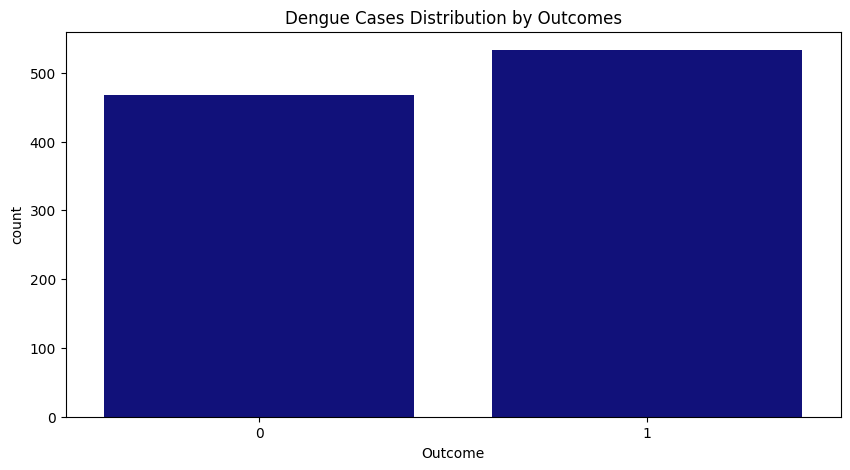

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outcome', data=df, color='darkblue')
plt.title('Dengue Cases Distribution by Outcomes')
plt.show()

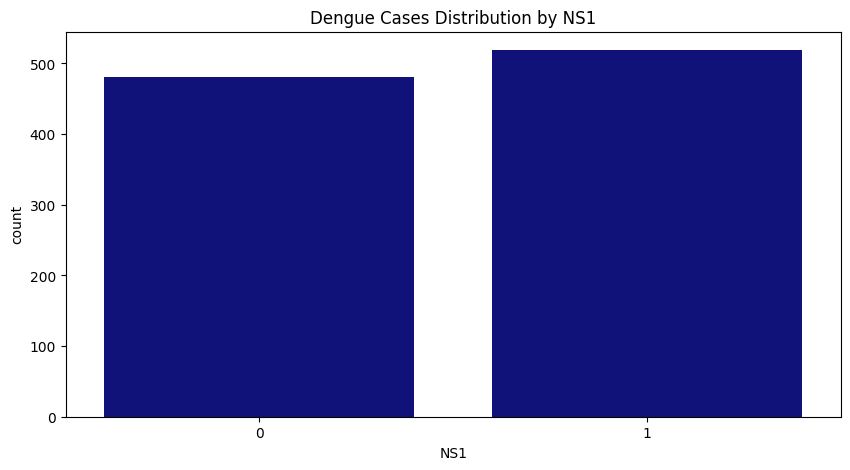

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='NS1', data=df, color='darkblue')
plt.title('Dengue Cases Distribution by NS1')
plt.show()

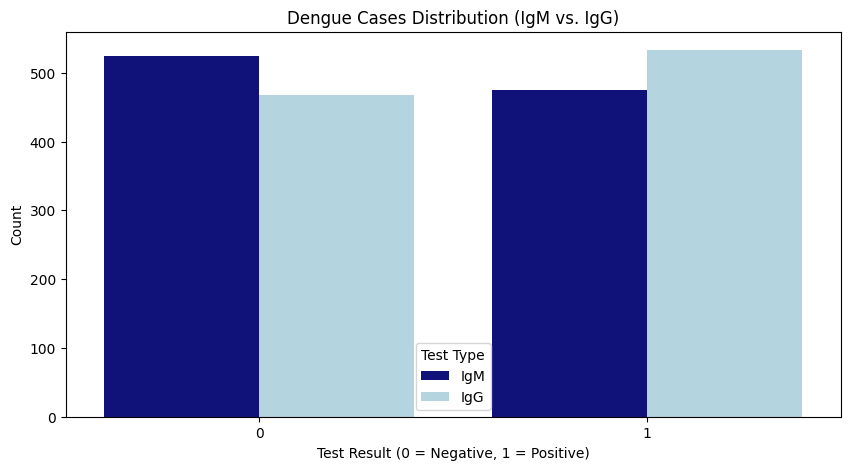

In [ ]:
# Melt the DataFrame to long format for seaborn
df_melted = df.melt(value_vars=['IgM', 'IgG'], var_name='Test Type', value_name='Result')


custom_palette = {"IgM": "darkblue", "IgG": "lightblue"}


# Plot both IgM and IgG on the same plot
plt.figure(figsize=(10,5))
sns.countplot(x='Result', hue='Test Type', data=df_melted, palette=custom_palette)


# Labels and Title
plt.xlabel("Test Result (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.title("Dengue Cases Distribution (IgM vs. IgG)")

# Show the plot
plt.show()

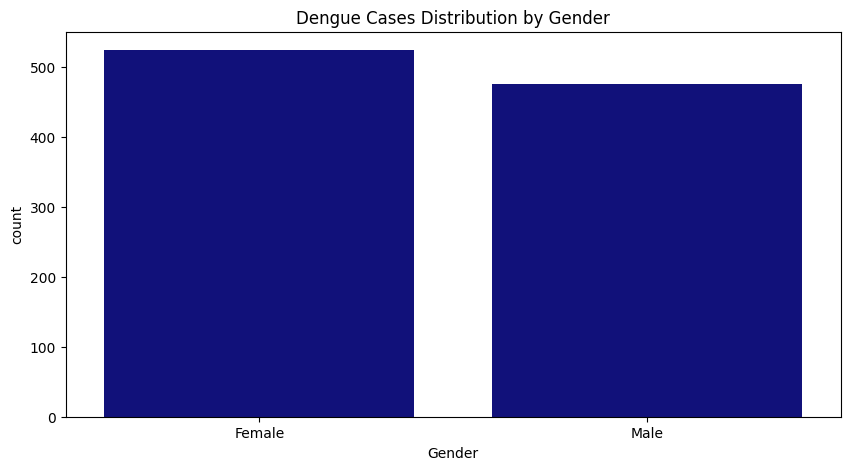

In [ ]:
# Data visualization
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=df, color='darkblue')
plt.title('Dengue Cases Distribution by Gender')
plt.show()

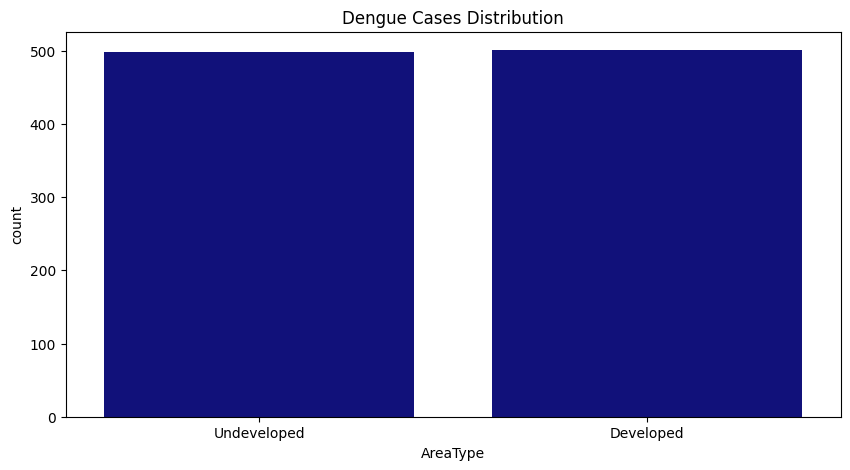

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='AreaType', data=df, color='darkblue')
plt.title('Dengue Cases Distribution')
plt.show()

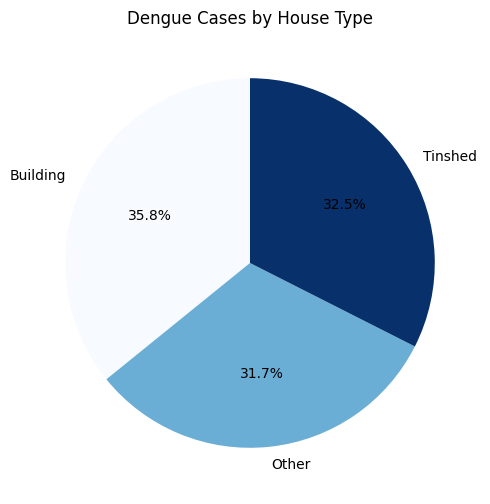

In [ ]:
# Aggregate by House Type
house_cases = df.groupby("HouseType")["Outcome"].sum()

# Plot Pie Chart
plt.figure(figsize=(6,6))
house_cases.plot.pie(autopct='%1.1f%%', cmap="Blues", startangle=90)
plt.title("Dengue Cases by House Type")
plt.ylabel("")
plt.show()

In [ ]:
# Aggregate dengue cases by district making sure you have more than 3 districts

district_cases = df.groupby('Area')['Outcome'].sum().reset_index()

# Check the number of unique districts/areas
print(district_cases['Area'].nunique())

# Ensure you have enough districts/areas for the desired number of clusters
# If not, adjust n_clusters or consider a different clustering approach

# Prepare data for clustering
# Use Area instead of Outcome for clustering
district_cases["Cluster"] = KMeans(n_clusters=3, random_state=42).fit_predict(district_cases[["Outcome"]])

# View results
print(district_cases.sort_values("Cluster"))

36
                   Area  Outcome  Cluster
3              Bangshal       24        0
8                 Demra       26        0
13            Jatrabari       31        0
35              Tejgaon       24        0
6            Cantonment       12        1
7            Chawkbazar       11        1
5                Bosila       11        1
2              Banasree       10        1
12           Hazaribagh       12        1
10             Gendaria        9        1
21              Lalbagh       10        1
17        Kamrangirchar       10        1
31             Shahbagh       11        1
28                Ramna       10        1
32  Sher-e-Bangla Nagar        9        1
4          Biman Bandar       12        1
34             Sutrapur       10        1
33             Shyampur        9        1
9             Dhanmondi       17        2
11              Gulshan       14        2
15               Kafrul       17        2
14            Kadamtali       19        2
18           Keraniganj       1

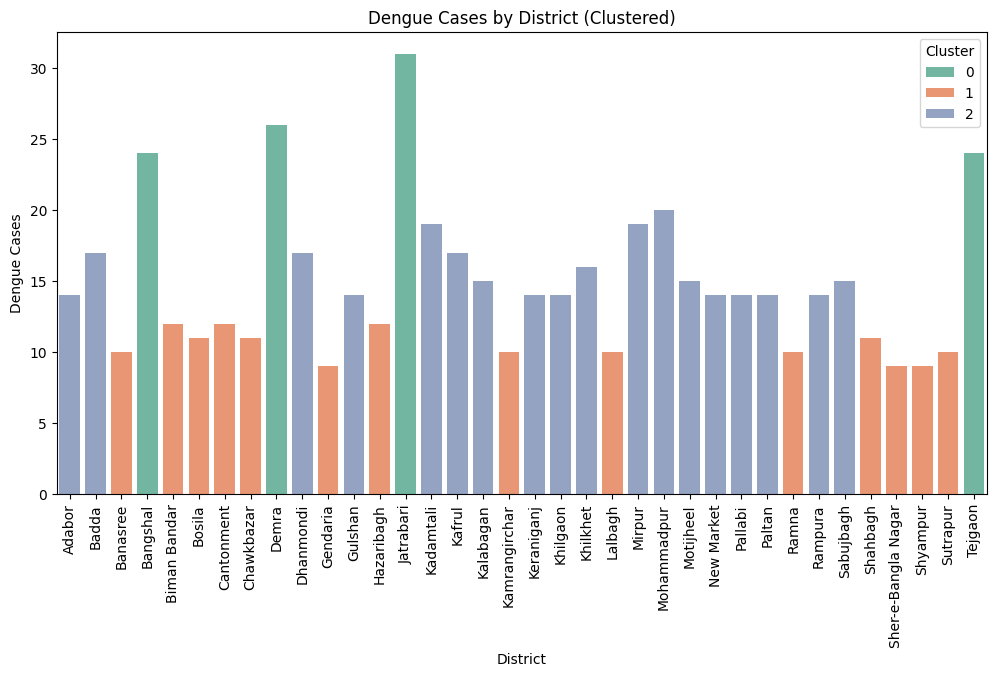

In [ ]:
# Set color palette for clusters
palette = sns.color_palette("Set2", n_colors=3)

# Bar plot of dengue cases by district, colored by cluster
plt.figure(figsize=(12, 6))
sns.barplot(x="Area", y="Outcome", hue="Cluster", data=district_cases, palette=palette)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel("District")
plt.ylabel("Dengue Cases")
plt.title("Dengue Cases by District (Clustered)")
plt.legend(title="Cluster")
plt.show()

Feature Engineering

In [ ]:
# Define features and target variable
X = df[['Age', 'Gender', 'NS1', 'IgG', 'IgM', 'AreaType', 'HouseType']]
y = df['Outcome']

In [ ]:
# Convert categorical features to numerical
X = pd.get_dummies(X, drop_first=True)

Splitting the dataset

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training, Prediction and Evaluation

Random Forest Modelling

In [ ]:
# Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
rf_pred = rf_model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Decision Tree Modelling

In [ ]:
# Model Training
dt_model = DecisionTreeClassifier() # Create an instance of DecisionTreeClassifier
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predictions
dt_pred = dt_model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Logistic Regression Modelling

In [ ]:
# Model Training
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
lg_pred = rf_model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, lg_pred))
print(classification_report(y_test, lg_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Risk Mapping

In [ ]:
# Check & Clean Data
df = df.dropna(subset=["Area", "Outcome"])  # Remove rows with missing values in key columns
df["Outcome"] = df["Outcome"].astype(int)  # Ensure Outcome is numeric (0 or 1)

# Define Area Coordinates for Dhaka (Manually Mapped)
area_coordinates = {
    "Gulshan": [23.7984, 90.4193],
    "Dhanmondi": [23.7471, 90.3748],
    "Mirpur": [23.8066, 90.3688],
    "Banani": [23.7945, 90.4049],
    "Uttara": [23.8761, 90.3798],
    "Mohammadpur": [23.7623, 90.3580],
    "Motijheel": [23.7324, 90.4167],
    "Bashundhara": [23.8197, 90.4506]
    # Add more areas if needed
}

# Aggregate Dengue Cases by Area
area_cases = df.groupby("Area")["Outcome"].sum().reset_index()

# Create Folium Map Centered in Dhaka
m = folium.Map(location=[23.8103, 90.4125], zoom_start=12, tiles="CartoDB Positron")  # English labels

# Prepare Data for HeatMap
heat_data = [
    [area_coordinates[area][0], area_coordinates[area][1], cases]
    for area, cases in zip(area_cases["Area"], area_cases["Outcome"])
    if area in area_coordinates
]

# Add HeatMap Layer
HeatMap(heat_data, radius=15, blur=10, min_opacity=0.5).add_to(m)

# Save and Display the Map
m.save("dengue_heatmap.html")
print("Heatmap saved as 'dengue_heatmap.html'. Open this file in a browser to view the map.")

Heatmap saved as 'dengue_heatmap.html'. Open this file in a browser to view the map.


In [ ]:
from folium.plugins import HeatMap
from folium import Map
from branca.element import Figure
from folium import plugins
from google.colab import output
from folium.plugins import HeatMap
from folium import plugins
from IPython.display import display

# Create Map
m = folium.Map(location=[23.8103, 90.4125], zoom_start=12)

# Add Heatmap
HeatMap(heat_data, radius=15, blur=10, min_opacity=0.5).add_to(m)

# Display the map
display(m)

Feature Importance

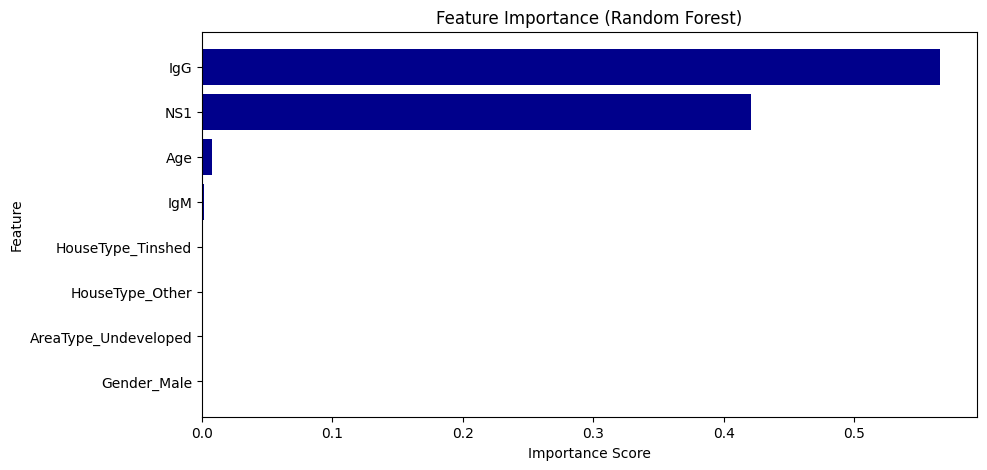

In [ ]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="darkblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Highest at top
plt.show()

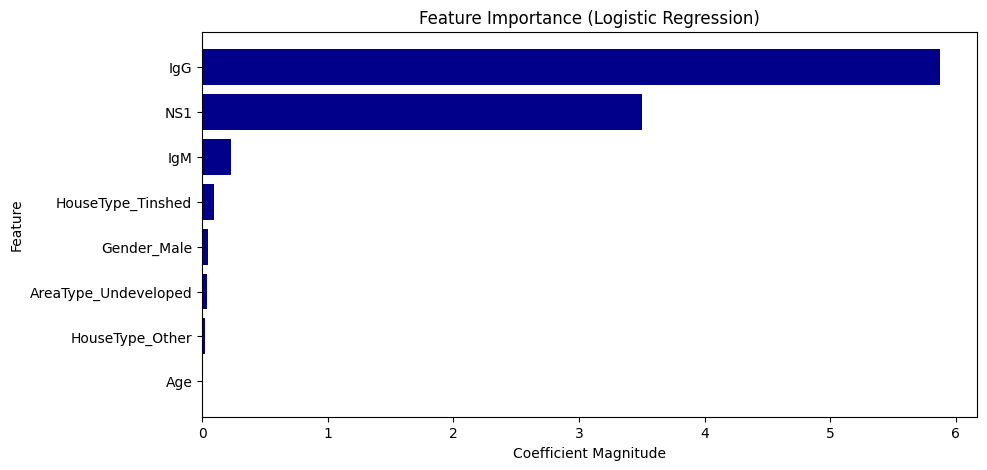

In [ ]:
# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

# Extract coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": np.abs(log_model.coef_[0])})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color="darkblue")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()

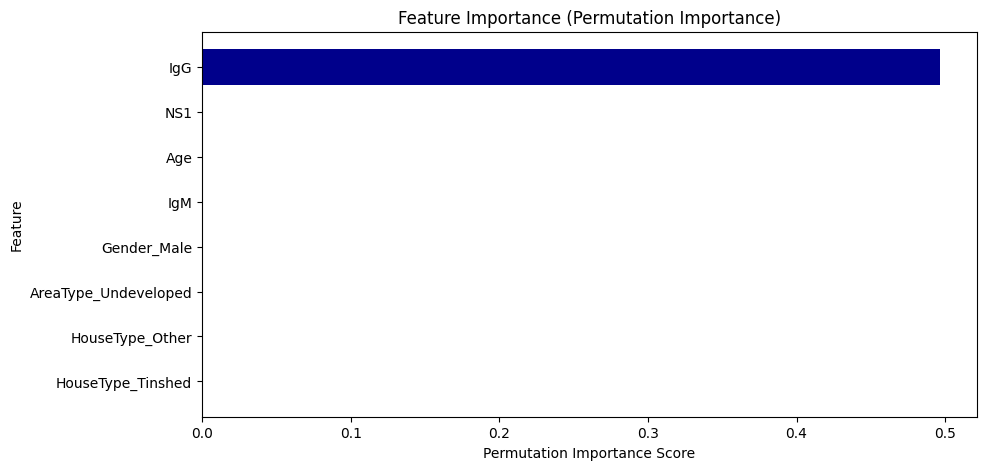

In [ ]:
# Compute permutation importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(perm_importance_df["Feature"], perm_importance_df["Importance"], color="darkblue")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Permutation Importance)")
plt.gca().invert_yaxis()
plt.show()

                Anne Amina Freitas